In [1]:
# importing data
import pandas as pd

df = pd.read_csv('faithful.xls')

print(df.head())

   Unnamed: 0  eruptions  waiting
0           1      3.600       79
1           2      1.800       54
2           3      3.333       74
3           4      2.283       62
4           5      4.533       85


In [2]:
df[df.isna().any(axis=1)]
# no null data was found

,Unnamed: 0,eruptions,waiting


In [3]:
# 1470 entries exist, i will only use first 100
df = df.iloc[0:100]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   eruptions   100 non-null    float64
 2   waiting     100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB
None


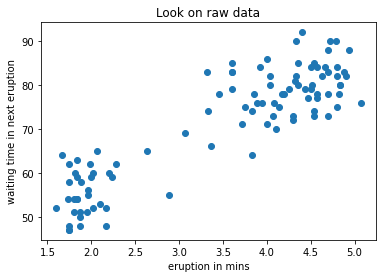

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (make_blobs,make_circles,make_moons)
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

# choosing age as independent variable, and education as dependent varaible
plt.scatter(df.eruptions, df.waiting)
plt.title('Look on raw data')
plt.xlabel('eruption in mins')
plt.ylabel('waiting time in next eruption')
plt.show()
# look at raw data tells that it's clusterable :)

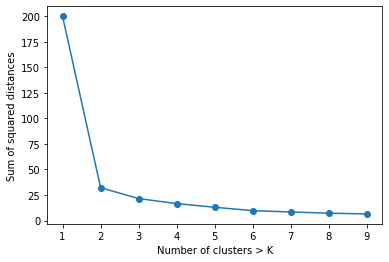

In [5]:
df = df[['eruptions','waiting']]

X_std = StandardScaler().fit_transform(df)

# avoid warnings
import warnings
warnings.filterwarnings('ignore')


# elbow method 
sse = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

# Plot sse against k
plt.plot(K, sse, '-o')
plt.xlabel(f'Number of clusters > K')
plt.ylabel('Sum of squared distances');

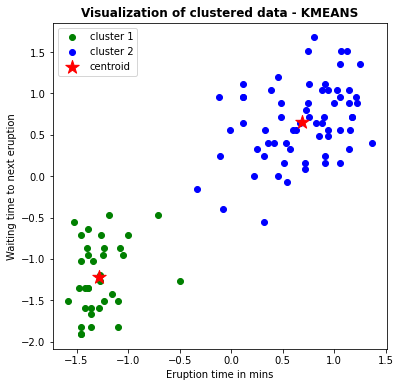

In [6]:
# elbow method tells us to use cluster = k = 2
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.cluster_centers_
labels = km.predict(X_std)

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[labels == 0, 0], X_std[labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[labels == 1, 0], X_std[labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200,
            c='r', label='centroid')
plt.legend()

plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data - KMEANS', fontweight='bold')
plt.show()
# nice cluster bro :)

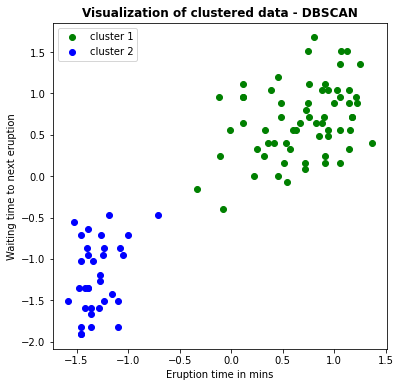

In [7]:
# dbscan
dbs = DBSCAN()
dbs.fit(X_std)
labels = dbs.labels_

fig, ax = plt.subplots(figsize=(6, 6))

plt.scatter(X_std[labels == 0, 0], X_std[labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[labels == 1, 0], X_std[labels == 1, 1],
            c='blue', label='cluster 2')
plt.legend()

plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data - DBSCAN', fontweight='bold')
plt.show()

In [8]:
# Find report in docs attached alongside 